<a href="https://colab.research.google.com/github/jerry-simon/Data_Science_And_Machine_Learning/blob/main/Yulu_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><font color='skyblue'>Defining the Business Problem</font></H1>

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

How you can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

<H1><font color='skyblue'>A Summary of the Dataset</font></H1>

In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway, shapiro, kruskal, levene, kstest
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind, ttest_rel, skew, kurtosis
from scipy.stats import chisquare, chi2_contingency, pearsonr, spearmanr

In [ ]:
#Reading the yulu bike sharing dataset
df = pd.read_csv('bike_sharing.csv')

In [ ]:
#Displaying 10 random samples from the given dataset
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10812,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89
3451,2011-08-13 17:00:00,3,0,0,2,29.52,34.850,74,16.9979,97,172,269
3813,2011-09-09 21:00:00,3,0,1,1,27.06,29.545,89,0.0000,49,154,203
513,2011-02-04 13:00:00,1,0,1,2,10.66,12.880,50,15.0013,9,73,82
8691,2012-08-04 12:00:00,3,0,0,1,35.26,39.395,40,23.9994,222,325,547
1639,2011-04-14 05:00:00,2,0,1,1,13.94,17.425,76,6.0032,2,12,14
5648,2012-01-10 12:00:00,1,0,1,1,17.22,21.210,38,19.9995,13,127,140
2646,2011-06-18 04:00:00,2,0,0,1,24.60,27.275,88,6.0032,1,4,5
524,2011-02-05 00:00:00,1,0,0,2,9.84,12.120,70,11.0014,3,36,39
9430,2012-09-16 07:00:00,3,0,0,1,20.50,24.240,77,7.0015,28,43,71


In [ ]:
#Exploring the shape of yulu dataset
df.shape

(10886, 12)

In the given yulu dataset there are 10886 records along with 12 columns.

In [ ]:
#To check the number of null values present in the given yulu dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

The dataset does not suffer from any null values.

In [ ]:
#To check the number of duplicate values present in the given yulu dataset
df.duplicated().sum()

0

The dataset does not suffer from any duplicate values.

In [ ]:
# To get a comprehensive overview of yulu dataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


The following Python function reveals some of the key information related to the Yulu dataset. First and foremost, the index range. There are 10886 records ranging from 0 to 10885. The next important insight that we can draw from this function is that it contains the names of all columns followed by its datatypes. The season, holiday, workingday, weather, humidity, casual, registered, and count are of the integer datatype or int64, followed by temp, atemp and windspeed are of float datatype or float64 and only one column is of object datatype. In short, there are 3 columns with float datatype, 8 columns with integer datatype and only 1 column is of object datatype.

Furthermore, the function also delves into the number of non-null entries in the dataset. As mentioned earlier, the dataset does not suffer from any data loss. Finally, the data frame occupies circa 1020.7 kilo bytes of memory.

In [ ]:
#To get the summary of the integer values of the Yulu dataset
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


We can draw many interesting insights based on the above table. However, I have only included the highlights of them.

<B>season</B> -> This is a categorical column in which there are 4 possible seasons where 1: spring, 2: summer, 3: fall, 4: winter.

<B>holiday</B> -> A categorical column to represent whether the day is a holiday or not, where 1 being holiday and 0 being a non-holiday.

<B>workingday</B> -> A categorical column to represent, if the day is neither weekend nor holiday which is 1, otherwise it is 0.

<B>weather</B> -> Another categorical column in which there are 4 possible weather conditions where <B>1:</B> Clear, Few clouds, partly cloudy, <B>2:</B> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, <B>3:</B> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds and <B>4:</B> Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog.

<B>temp</B> -> A floating value in which temperature is in Celsius. The minimum recorded temperature value is 0.82 degree celsius and the maximum recorded temperature value is 41 degree celsius. Finally, the average temperature is 20.23 degree celsius.

<B>atemp</B> -> A floating value in which feeling temperature in Celsius. The minimum recorded feeling temperature value is 0.76 degree celsius and the maximum recorded feeling temperature value is 45.45 degree celsius. Finally, the average feeling temperature is 23.65 degree celsius.

<B>humidity</B> -> An integer value in which humidity is measured. The minimum humidity recorded is 0.0 and the maximum humidity recorded is 100.00. Finally, the average recorded humidity is 61.88.

<B>windspeed</B> -> A floating value in which windspeed is measured. The minimum recorded windspeed value is 0.0 and the maximum recorded windspeed value is 56.99. Finally, the average windspeed is 12.79.

<B>casual</B> -> An integer value that shows the total number of casual users in the yulu dataset. The minimum value is 0.0 and the maximum value is 367. Finally, the average number of casual users is 36.02.

<B>registered</B> -> An integer value that shows the total number of registered users in the yulu dataset. The minimum value is 0.0 and the maximum value is 886. Finally, the average number of registered users is 155.55.

<B>count</B> -> An integer value that shows the total rental bikes including both casual and registered. The minimum value is 1.0 and the maximum value is 977. Finally, the average number of both casual and registered users is 191.57.

In [ ]:
# Frequency or the mode of integer values present in the Yulu dataset is shown below
# This is calculated because mode value is absent while using the describe funtion.
print("frequent season is     : ", df['season'].mode()[0])
print("frequent holiday is    : ", df['holiday'].mode()[0])
print("frequent workingday is : ", df['workingday'].mode()[0])
print("frequent weather is    : ", df['weather'].mode()[0])
print("frequent temp is       : ", df['temp'].mode()[0])
print("frequent atemp is      : ", df['atemp'].mode()[0])
print("frequent humidity is   : ", df['humidity'].mode()[0])
print("frequent windspeed is  : ", df['windspeed'].mode()[0])
print("frequent casual is     : ", df['casual'].mode()[0])
print("frequent registered is : ", df['registered'].mode()[0])
print("frequent count is      : ", df['count'].mode()[0])

frequent season is     :  4
frequent holiday is    :  0
frequent workingday is :  1
frequent weather is    :  1
frequent temp is       :  14.76
frequent atemp is      :  31.06
frequent humidity is   :  88
frequent windspeed is  :  0.0
frequent casual is     :  0
frequent registered is :  3
frequent count is      :  5


In [ ]:
#Summary statistics of categorical column
df.describe(include=['object'])

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


The only object data type in the Yulu dataset is datetime. Evidently, there's no peculiar significance which we can infer from the above summary.

<H1><font color='skyblue'>Value Counts of Categorical Variables</font></H1>

In [ ]:
#Total number of seasons in the Yulu dataset
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

The top season available in the Yulu dataset is 4, in other words, winter. This trend is then followed by 2 & 3 or summer and fall. Finally, the least season is spring.

In [ ]:
#Total number of holidays and non-holidays in the Yulu dataset
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

Most of the days are non-holidays 10575, followed by 311 holidays.

In [ ]:
#Total number of workingdays and non-workingdays in the Yulu dataset
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

Most of the days are working days 7412, followed by 3474 holidays which includes weekends and holidays.

In [ ]:
#Total number of weather conditions available in the Yulu dataset
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

The top weather condition available in the Yulu dataset is 1, in other words, clear, few clouds. This trend is then followed by 2 which is mist + cloud. Followed by, 3 which is light snow and rain. Finally, the least weather condition is 4 which is heavy rain.

<H1><font color='skyblue'>Uni-variate Analysis</font></H1>

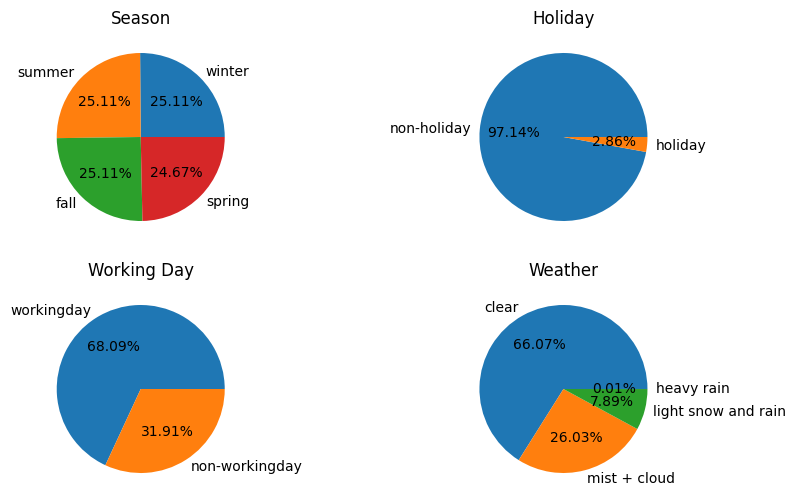

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
# percentage contributions of each categorical variables
df_new = df.copy()
df_new['season'] = df_new['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df_new['holiday'] = df_new['holiday'].map({0: 'non-holiday', 1: 'holiday'})
df_new['workingday'] = df_new['workingday'].map({0: 'non-workingday', 1: 'workingday'})
df_new['weather'] = df_new['weather'].map({1: 'clear', 2: 'mist + cloud', 3: 'light snow and rain', 4: 'heavy rain'})
ax[0, 0].pie(df_new['season'].value_counts(), labels=df_new['season'].value_counts().index, autopct='%1.2f%%')
ax[0, 1].pie(df_new['holiday'].value_counts(), labels=df_new['holiday'].value_counts().index, autopct='%1.2f%%')
ax[1, 0].pie(df_new['workingday'].value_counts(), labels=df_new['workingday'].value_counts().index, autopct='%1.2f%%')
ax[1, 1].pie(df_new['weather'].value_counts(), labels=df_new['weather'].value_counts().index, autopct='%1.2f%%')

# Set titles for each subplot
ax[0, 0].set_title('Season')
ax[0, 1].set_title('Holiday')
ax[1, 0].set_title('Working Day')
ax[1, 1].set_title('Weather')

plt.show()

<B>season</B> -> Almost all the seasons contributes equally in the yulu dataset. However, there's a small variation in spring season which is approximately 24.67%.

<B>holiday</B> -> Approximately 97.14% of the availabe data is non-holiday and only 2.86% of the data is holiday.

<B>workingday</B> -> Approximately 68.09% of the available data is working day and 31.91% of the data is non-working day and that includes weekends and other holidays.

<B>weather</B> -> The top most common weather condition available in yulu dataset is clear sky. This trend is then followed by mist and cloud 26.03%. Again it is followed by light snow and rain which is 7.89%. Finally, the least common weather condition in yulu dataset is heavy rain which is 0.01%

<H1><font color = 'skyblue'>Outlier Detection - Using Boxplot (Univariate Analysis)</font></H1>

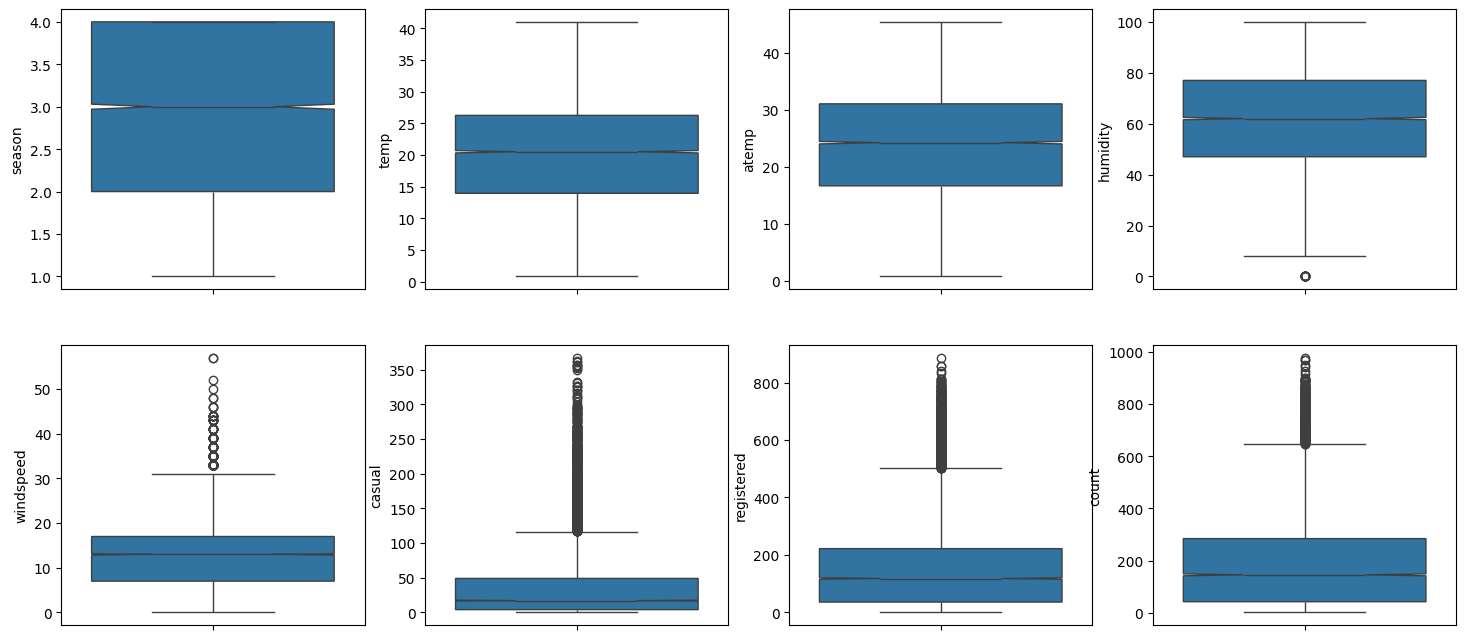

In [ ]:
#Plotting boxplots for variables season, temp, atemp, humidity, windspeed, casual, registered and count.
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
sns.boxplot(df['season'], notch=True,ax=ax[0, 0])
sns.boxplot(df['temp'], notch=True,ax=ax[0, 1])
sns.boxplot(df['atemp'], notch=True,ax=ax[0, 2])
sns.boxplot(df['humidity'], notch=True,ax=ax[0, 3])
sns.boxplot(df['windspeed'], notch=True,ax=ax[1, 0])
sns.boxplot(df['casual'], notch=True,ax=ax[1, 1])
sns.boxplot(df['registered'], notch=True,ax=ax[1, 2])
sns.boxplot(df['count'], notch=True,ax=ax[1, 3])
plt.show()

There's not much outliers season, temp, atemp and humidity. However, there's a lot of outliers present in windspeed, casual, registered and count.

<B>NB</B> : Outlier treatment is not applicable for casual, registered and count, because these variables are neither continous nor categorical. It can be applied to windspeed but our hypothesis test does not include windspeed and so we are not applying any outlier treatments.

Casual, Registered and Count - These variables contain total number of users.

<H1><font color = 'skyblue'>Outlier Detection - Using IQR</font></H1>

In [ ]:
#A funtion to detect the number of outliers above and below the thresholds
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    # Define lower and upper thresholds for outliers
    lower_threshold = q1 - 1.5 * IQR
    upper_threshold = q3 + 1.5 * IQR
    # Identify outliers
    lower_outliers = df[(df < lower_threshold)]
    upper_outliers = df[(df > upper_threshold)]
    # Return the number of outliers above and below the thresholds
    return lower_outliers.size, upper_outliers.size

In [ ]:
#Total number of outliers present above and below. Finally, the overall presence of outliers in the Yulu dataset
#outlier presence for windspeed
x, y = find_outliers_IQR(df['windspeed'])
print("windspeed Lower outliers        : ", x)
print("windspeed Upper outliers        : ", y)
percentage_of_outliers = round((x+y)*100/df.shape[0],2)
print("Percentage of outliers          : ", percentage_of_outliers,'%')
#outlier presence for casual users
x, y = find_outliers_IQR(df['casual'])
print("casual users Lower outliers     : ", x)
print("casual users Upper outliers     : ", y)
percentage_of_outliers = round((x+y)*100/df.shape[0],2)
print("Percentage of outliers          : ", percentage_of_outliers,'%')
#outlier presence for registered users
x, y = find_outliers_IQR(df['registered'])
print("registered users Lower outliers : ", x)
print("registered users Upper outliers : ", y)
percentage_of_outliers = round((x+y)*100/df.shape[0],2)
print("Percentage of outliers          : ", percentage_of_outliers,'%')
#outlier presence for count (Both casual and registered)
x, y = find_outliers_IQR(df['count'])
print("Total users Lower outliers      : ", x)
print("Total users Upper outliers      : ", y)
percentage_of_outliers = round((x+y)*100/df.shape[0],2)
print("Percentage of outliers          : ", percentage_of_outliers,'%')

windspeed Lower outliers        :  0
windspeed Upper outliers        :  227
Percentage of outliers          :  2.09 %
casual users Lower outliers     :  0
casual users Upper outliers     :  749
Percentage of outliers          :  6.88 %
registered users Lower outliers :  0
registered users Upper outliers :  423
Percentage of outliers          :  3.89 %
Total users Lower outliers      :  0
Total users Upper outliers      :  300
Percentage of outliers          :  2.76 %


It seems like there's only 2.09% of outliers present in the windspeed column of yulu dataset. Approximately 6.88% of the outliers are present in the casual users and 3.89% of the outliers are present in the registered users. Lastly, around 2.76% of the outliers are included in the count column. Thus, we can now confirm that outlier presence is comparitively low in the given dataset.

<H1><font color = 'skyblue'>Univariate Analysis - Histogram</font></H1>

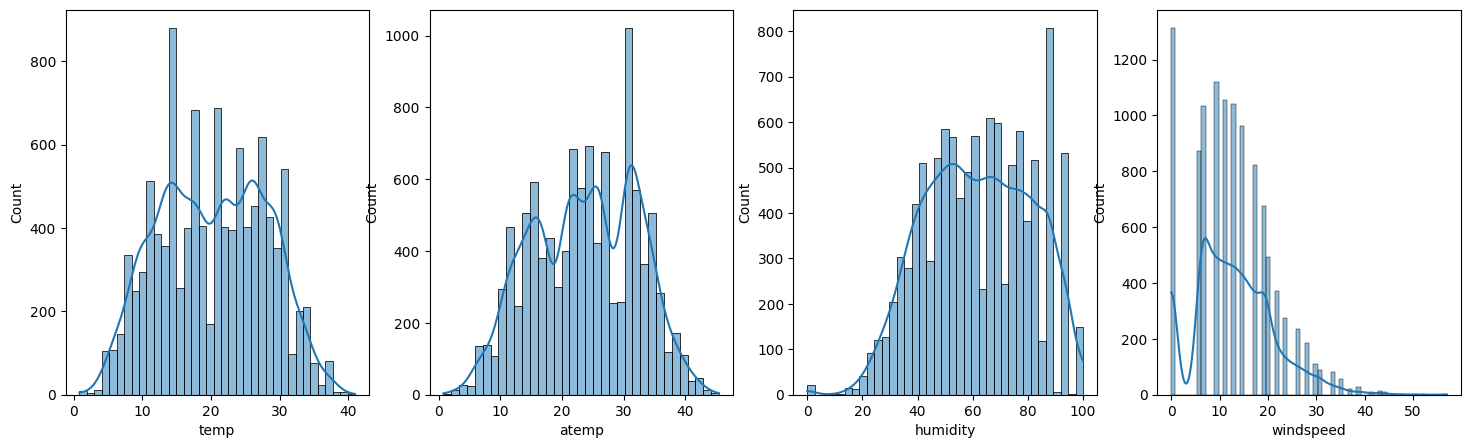

In [ ]:
#Plotting Histogram for the continous variables temp, atemp, humidity and windspeed
fig, ax = plt.subplots(1, 4, figsize=(18, 5))
sns.histplot(df['temp'], kde=True, ax=ax[0])
sns.histplot(df['atemp'], kde=True, ax=ax[1])
sns.histplot(df['humidity'], kde=True, ax=ax[2])
sns.histplot(df['windspeed'], kde=True, ax=ax[3])
plt.show()

It seems like both temp and atemp (feeling temperature) seems to follow a normal distribution. Humidity seems like to follow a left skewed plot and windspeed seems to be a right skewed plot.

<H1><font color = 'skyblue'>Bivariate Analysis</font></H1>

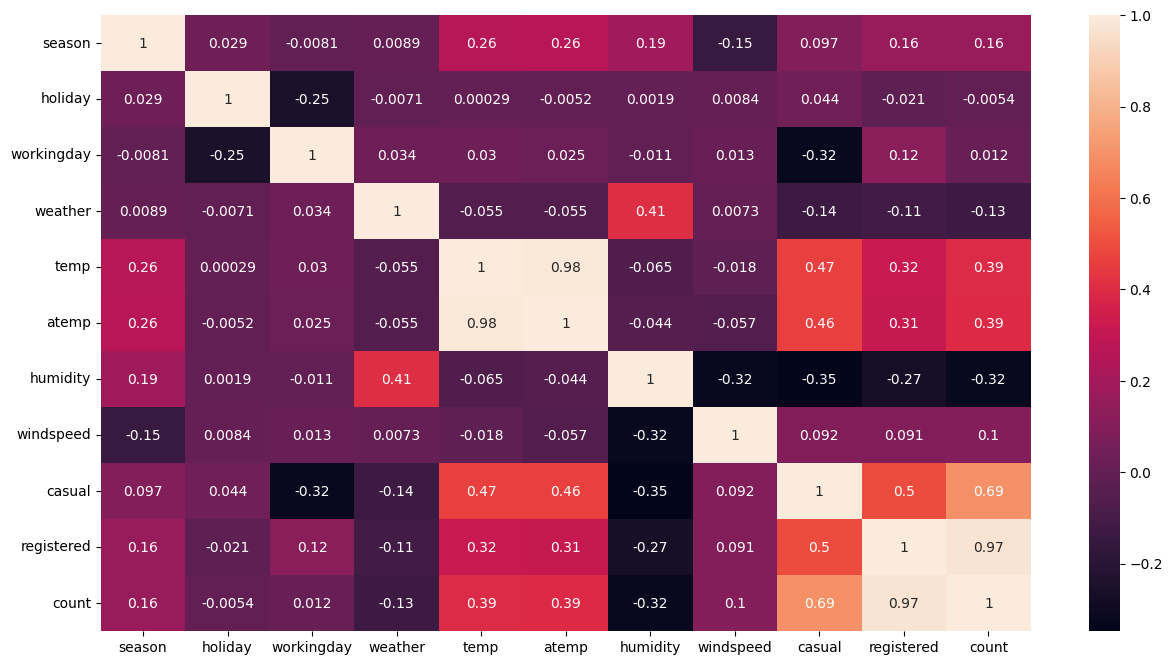

In [ ]:
#Correlation between all the variables except datetime
df_new = df.copy()
plt.figure(figsize=(15, 8))
df_new.drop(['datetime'], axis=1, inplace=True)
sns.heatmap(df_new.corr(), annot=True)
plt.show()

The correlation between 11 variables are shown in the above picture. The diagonal values represents when a variable that is correlated to itself. The values above the diagonal and below the diagonal are same. To understand this in detail we only consider the values below the diagonal elements, and some of the highlighted once are only described.

<B>Count vs Registered</B> -> These 2 variables are highly positively corelated. This means that as registered users increses count of users increases too.

<B>temp vs atemp</B> -> These 2 variables are highly positively corelated. This means that as temperature increses feeling temperature increases too.

<B>holiday</B> -> This variable does not have any impact on count, casual, registered, windspeed, humidity, temp, atemp and on weather. Almost we can conclude that this variable can be an independent variable. The reason is because the correlated values are approximately equal to 0.

<B>humidity</B> -> This variable is weakly negatively correlated to windspeed, casual, registered and count. This means that when any of these value increased the humidity decreases. However, we cannot say that this is the actual cause.

<B>season vs workingday</B> -> These 2 variables are almost independent because their correlated value is approximately 0.

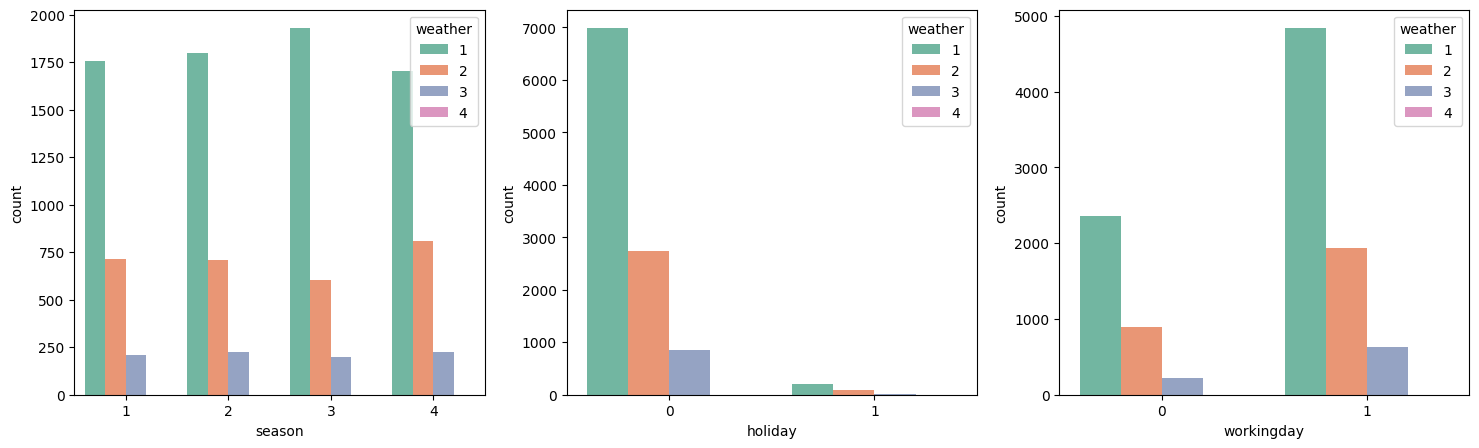

In [ ]:
#histogram shows the impact of weather on season, holiday and workingday
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='season', hue='weather', palette='Set2', data=df_new, ax=ax[0])
sns.countplot(x='holiday', hue='weather', palette='Set2', data=df_new, ax=ax[1])
sns.countplot(x='workingday', hue='weather', palette='Set2', data=df_new, ax=ax[2])
plt.show()

<B>Impact of weather on each season</B> -> It seems like in all 4 seasons clear sky is mostly observed. Followed by mist and cloud and then light snow and rain. Finally, heavy rain is observed leastly in all 4 seasons. Clear sky is mostly observed in the fall season and less in winter season.

<B>Impact of weather on holidays</B> -> Whether it is holiday or not a clear sky is mostly observed and heavy rain is least observed.

<B>Impact of weather on workingdays</B> -> Whether it is a holiday or a workingday clear sky is mostly observed, followed by mist and cloud and then light snow and rain. Finally, heavy rain is least observed.

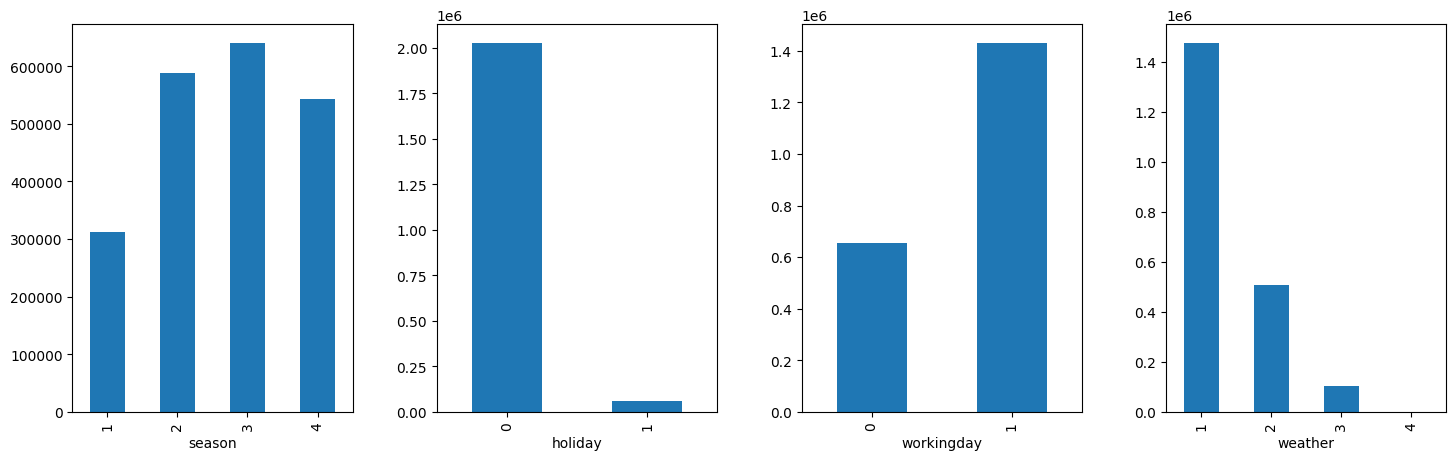

In [ ]:
#histogram shows the impact of season, holiday, workingday and weather on the total number of riders (including both casual and registered)
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
df_new.groupby('season')['count'].sum().plot(kind='bar', ax=axis[0])
df_new.groupby('holiday')['count'].sum().plot(kind='bar', ax=axis[1])
df_new.groupby('workingday')['count'].sum().plot(kind='bar', ax=axis[2])
df_new.groupby('weather')['count'].sum().plot(kind='bar', ax=axis[3])
plt.show()

<B>Seasonal riders</B> -> The majority of the riders are travelling in fall season, followed by summer and then winter. The least number of riders are travelled in spring season.

<B>Riders on holidays</B> -> The majority of the riders are travelling on non-holidays because most of the riders utilises the Yulu bikes to commute to workplaces, shopping malls and other destinations as well. Yulu riders are less common on holidays.

<B>Riders on workingdays</B> -> The majority of the riders are travelling on workingdays because most of the riders utilises the Yulu bikes to commute to workplaces, shopping malls and other destinations as well. Yulu riders are less common on non-working days.

<B>Riders in different weather conditions</B> -> The majority of the riders are travelling in clear sky weather condition followed by mist and cloud and then light snow and rain. The least number of riders are travelled in heavy rain weather conditions.

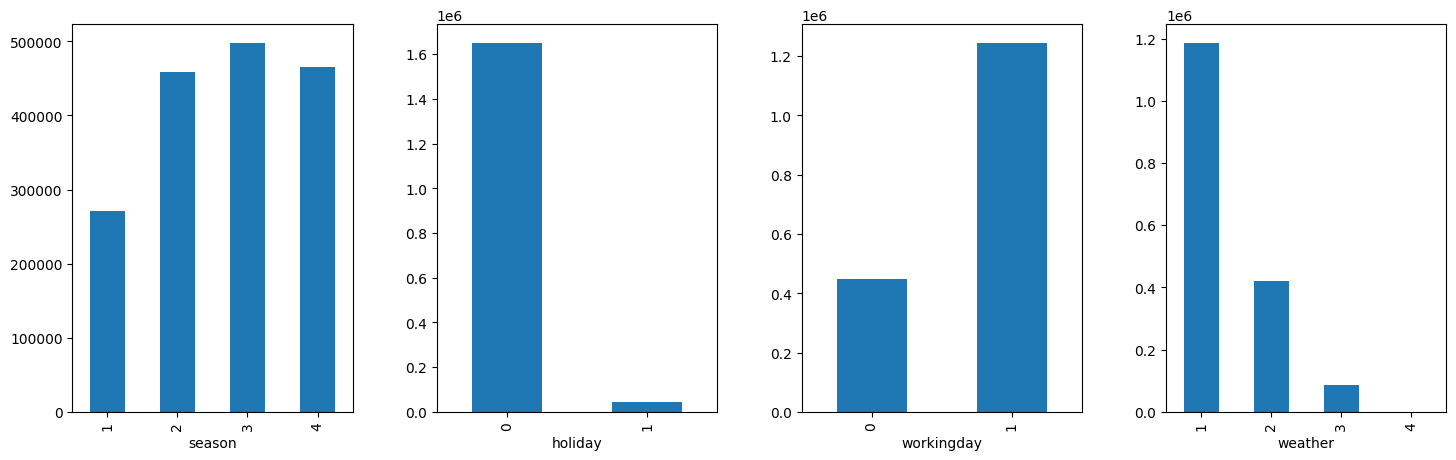

In [ ]:
#histogram shows the impact of season, holiday, workingday and weather on the total number of registered riders.
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
df_new.groupby('season')['registered'].sum().plot(kind='bar', ax=axis[0])
df_new.groupby('holiday')['registered'].sum().plot(kind='bar', ax=axis[1])
df_new.groupby('workingday')['registered'].sum().plot(kind='bar', ax=axis[2])
df_new.groupby('weather')['registered'].sum().plot(kind='bar', ax=axis[3])
plt.show()

<B>Seasonal registered riders</B> -> The majority of the registered riders are travelling in fall season, followed by winter and then summer. The least number of registered riders are travelled in spring season.

<B>Registered riders on holidays</B> -> The majority of the registered riders are travelling on non-holidays because most of the registered riders utilises the Yulu bikes to commute to workplaces, shopping malls and other destinations as well. Registered yulu riders are less common on holidays.

<B>Registered riders on workingdays</B> -> The majority of the registered riders are travelling on workingdays because most of the registered riders utilises the Yulu bikes to commute to workplaces, shopping malls and other destinations as well. Registered yulu riders are less common on non-working days.

<B>Registered riders in different weather conditions</B> -> The majority of the registered riders are travelling in clear sky weather condition followed by mist and cloud and then light snow and rain. The least number of registered riders are travelled in heavy rain weather conditions.

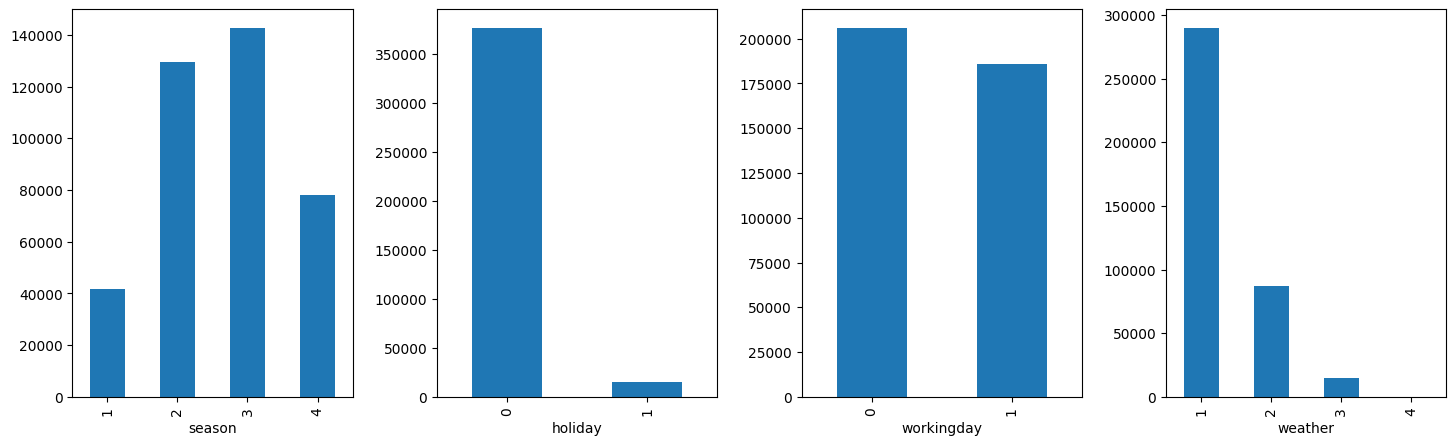

In [ ]:
#histogram shows the impact of season, holiday, workingday and weather on the total number of casual riders.
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
df_new.groupby('season')['casual'].sum().plot(kind='bar', ax=axis[0])
df_new.groupby('holiday')['casual'].sum().plot(kind='bar', ax=axis[1])
df_new.groupby('workingday')['casual'].sum().plot(kind='bar', ax=axis[2])
df_new.groupby('weather')['casual'].sum().plot(kind='bar', ax=axis[3])
plt.show()

<B>Seasonal casual riders</B> -> The majority of the casual riders are travelling in fall season, followed by summer and then winter. The least number of casual riders are travelled in spring season.

<B>casual riders on holidays</B> -> The majority of the casual riders are travelling on non-holidays because most of the casual riders utilises the Yulu bikes to commute to workplaces, shopping malls and other destinations as well. casual yulu riders are less common on holidays.

<B>casual riders on workingdays</B> -> The majority of the casual riders are travelling on non-workingdays because most of the casual riders utilises the Yulu bikes to commute to tourist locations and other well know spots. Casual yulu riders are less common on working days.

<B>casual riders in different weather conditions</B> -> The majority of the casual riders are travelling in clear sky weather condition followed by mist and cloud and then light snow and rain. The least number of casual riders are travelled in heavy rain weather conditions.

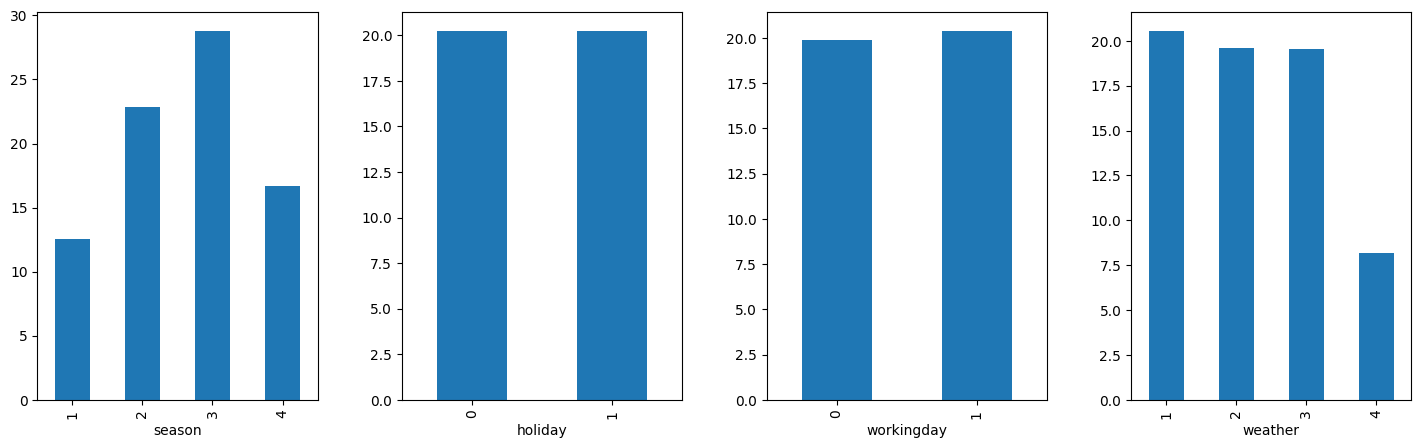

In [ ]:
#Average temperature recorded in each season, holidays, workingdays and weather conditions.
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
df_new.groupby('season')['temp'].mean().plot(kind='bar', ax=axis[0])
df_new.groupby('holiday')['temp'].mean().plot(kind='bar', ax=axis[1])
df_new.groupby('workingday')['temp'].mean().plot(kind='bar', ax=axis[2])
df_new.groupby('weather')['temp'].mean().plot(kind='bar', ax=axis[3])
plt.show()

The average temperature in fall is high compared to summer. We cannot consider this one as a genuine scenario because we have already observed that the number of riders are quite high in fall season, and as a result the number of temperature's recorded for fall season in the yulu dataset is also high. When we perform the mean operation under this condition we can observe a descrpency that says avg. temperature is high on fall season compared to summer.

There's no peculiar conclusion that we can draw from temperature on holidays and workingdays.

The avg. temperature measured under clear sky weather condition is high, followed by light snow and rain, mist and cloud and finally heavy rain.

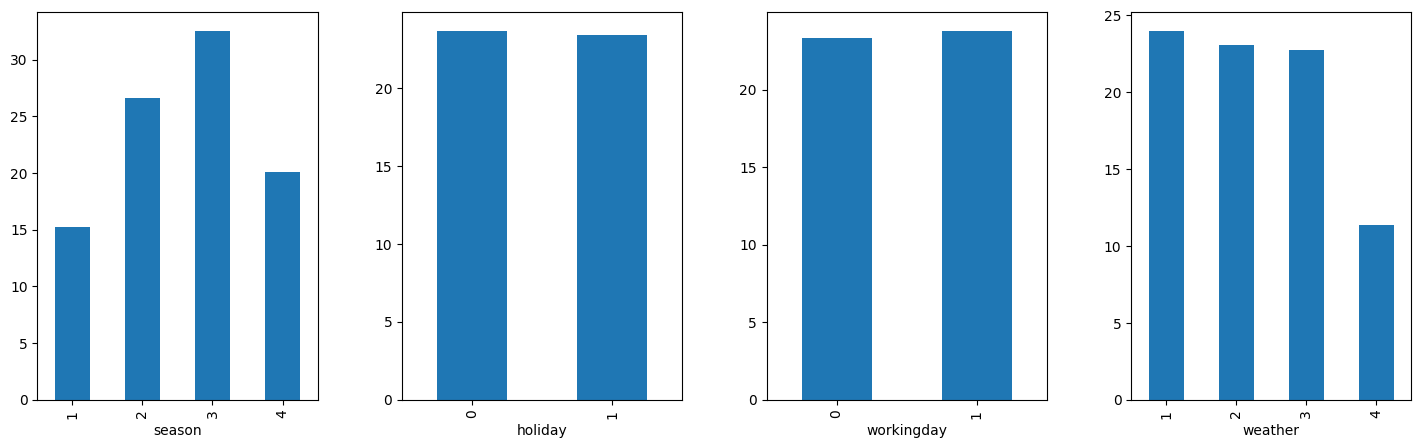

In [ ]:
#Average feeling temperature recorded in each season, holidays, workingdays and weather conditions.
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
df_new.groupby('season')['atemp'].mean().plot(kind='bar', ax=axis[0])
df_new.groupby('holiday')['atemp'].mean().plot(kind='bar', ax=axis[1])
df_new.groupby('workingday')['atemp'].mean().plot(kind='bar', ax=axis[2])
df_new.groupby('weather')['atemp'].mean().plot(kind='bar', ax=axis[3])
plt.show()

The average feeling temperature in fall is high compared to summer. We cannot consider this one as a genuine scenario because we have already observed that the number of riders are quite high in fall season, and as a result the number of feeling temperature's recorded for fall season in the yulu dataset is also high. When we perform the mean operation under this condition we can observe a descrpency that says avg. feeling temperature is high on fall season compared to summer.

There's no peculiar conclusion that we can draw from feeling temperature on holidays and workingdays.

The avg. feeling temperature measured under clear sky weather condition is high, followed by mist and cloud, then light snow and rain and finally heavy rain.

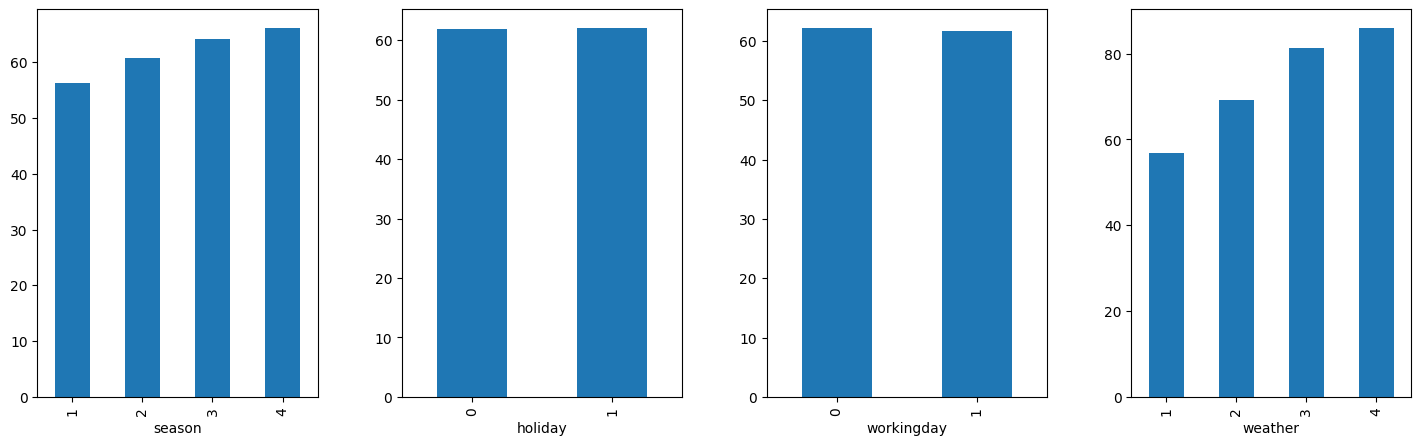

In [ ]:
#Average humidity recorded in each season, holidays, workingdays and weather conditions.
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
df_new.groupby('season')['humidity'].mean().plot(kind='bar', ax=axis[0])
df_new.groupby('holiday')['humidity'].mean().plot(kind='bar', ax=axis[1])
df_new.groupby('workingday')['humidity'].mean().plot(kind='bar', ax=axis[2])
df_new.groupby('weather')['humidity'].mean().plot(kind='bar', ax=axis[3])
plt.show()

The average humidity in winter is high. This trend is then followed by fall, summer and spring.

There's no peculiar conclusion that we can draw from humidity on holidays and workingdays.

The avg. humidity measured under heavy rainfall weather condition is high, followed by light snow and rain, then mist and cloud and finally on clear sky weather conditions.

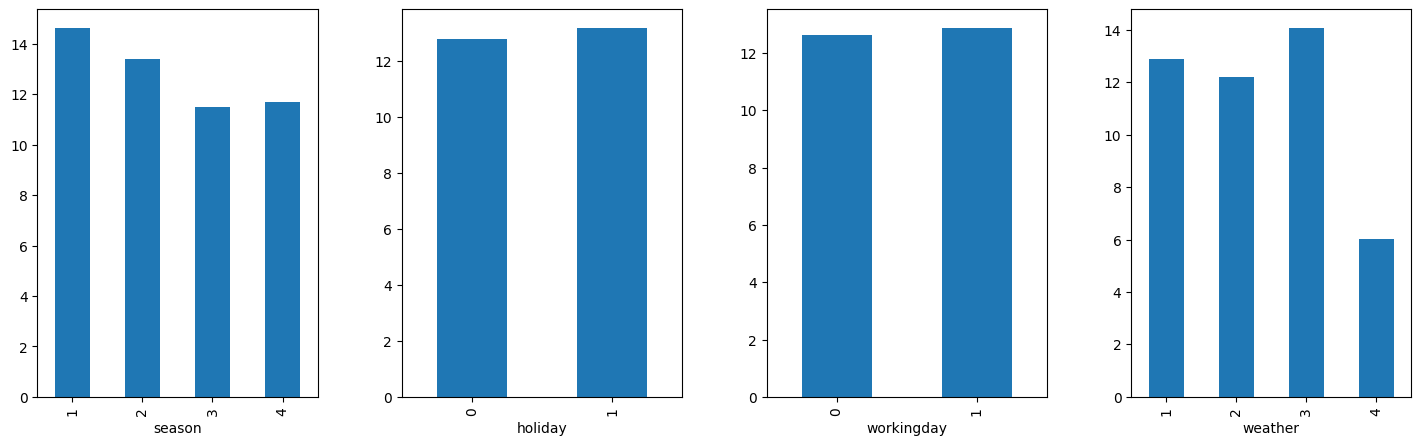

In [ ]:
#Average windspeed recorded in each season, holidays, workingdays and weather conditions.
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
df_new.groupby('season')['windspeed'].mean().plot(kind='bar', ax=axis[0])
df_new.groupby('holiday')['windspeed'].mean().plot(kind='bar', ax=axis[1])
df_new.groupby('workingday')['windspeed'].mean().plot(kind='bar', ax=axis[2])
df_new.groupby('weather')['windspeed'].mean().plot(kind='bar', ax=axis[3])
plt.show()

The average windspeed in spring is high. This trend is then followed by summer, then winter and finally fall.

There's no peculiar conclusion that we can draw from windspeed on holidays and workingdays.

The avg. windspeed measured under light snow and rain weather condition is high, followed by clear weather conditions, then mist and cloud and finally on heavy rain weather conditions.

In [ ]:
#splitting date time column into hour, month, day and year.
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['year'] = df['datetime'].dt.year

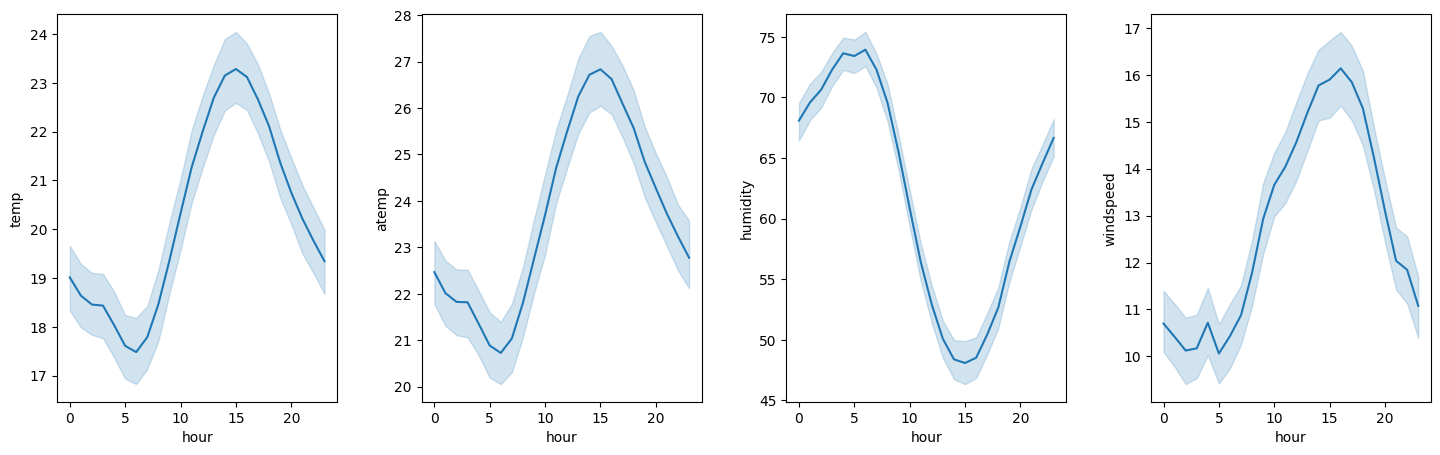

In [ ]:
#A line plot to represent change in temperature, feeling temperature, humidity and windspeed on hourly basis.
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
sns.lineplot(x='hour', y='temp', data=df, ax=axis[0])
sns.lineplot(x='hour', y='atemp', data=df, ax=axis[1])
sns.lineplot(x='hour', y='humidity', data=df, ax=axis[2])
sns.lineplot(x='hour', y='windspeed', data=df, ax=axis[3])
plt.show()

<B>hourly tempeature change</B> -> There is a gradual decrease in the temperature from 12:00 a.m. (0:00) to 5:00 a.m. After 5:00 a.m. the temperature gradually increases till 15:00 p.m. (3:00 p.m). Again the temperature falls gradually from 3:00 p.m to 23:00 p.m.

<B>hourly feeling tempeature change</B> -> There is a gradual decrease in the feeling temperature from 12:00 a.m. (0:00) to 5:00 a.m. After 5:00 a.m. the feeling temperature gradually increases till 15:00 p.m. (3:00 p.m). Again the feeling temperature falls gradually from 3:00 p.m to 23:00 p.m.

<B>hourly humidity change</B> -> There is a gradual increase in the humidity from 12:00 a.m. (0:00) to 5:00 a.m. After 5:00 a.m. the humidity gradually decreases till 15:00 p.m. (3:00 p.m). Again the temperature rises gradually from 15:00 p.m to 23:00 p.m.

<B>hourly windspeed change</B> -> There is a fluctuation in the windspeed from 12:00 a.m. (0:00) to 5:00 a.m. After 5:00 a.m. the windspeed gradually increases till 15:00 p.m. (3:00 p.m). Again the windspeed falls gradually from 3:00 p.m to 23:00 p.m.

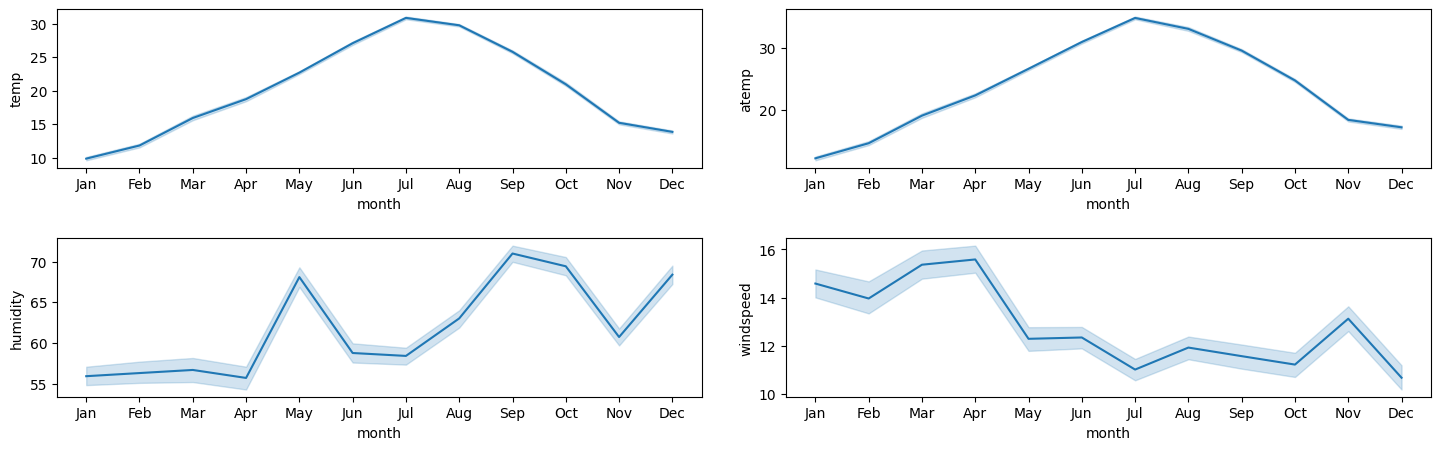

In [ ]:
#A line plot to represent change in temperature, feeling temperature, humidity and windspeed on monthly basis.
fig, axis = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
df_new['month'] = df['month']
df_new['month'] = df_new['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
sns.lineplot(x='month', y='temp', data=df_new, ax=axis[0,0])
sns.lineplot(x='month', y='atemp', data=df_new, ax=axis[0,1])
sns.lineplot(x='month', y='humidity', data=df_new, ax=axis[1,0])
sns.lineplot(x='month', y='windspeed', data=df_new, ax=axis[1,1])
plt.show()

<B>monthly tempeature change</B> -> There is a gradual increase in the temperature from Jan to Jul. After Jul. the temperature gradually decreases till dec.

<B>monthly feeling tempeature change</B> -> There is a gradual increase in the feeling temperature from Jan to Jul. After Jul. the feeling temperature gradually decreases till dec.

<B>monthly humidity change</B> -> There is a steady increase in humidty from Jan to Mar and from Mar to Apr a steady decrease in the humidity. Then the humidity skyrocketed from Apr to May and plummeted from May to Jun and gradually decreases to the month of Jul. From Jul to Sep the humidity gradually increases and then gradually decreases from Sep to Nov. Again from Nov to Dec the humidity increases.

<B>monthly windspeed change</B> -> There is a steady decrease in the windspeed from Jan to Feb. From the month of Feb to Apr the wind speed rises gradually. From Apr to Dec the windspeed decreses in a fluctuating pattern.

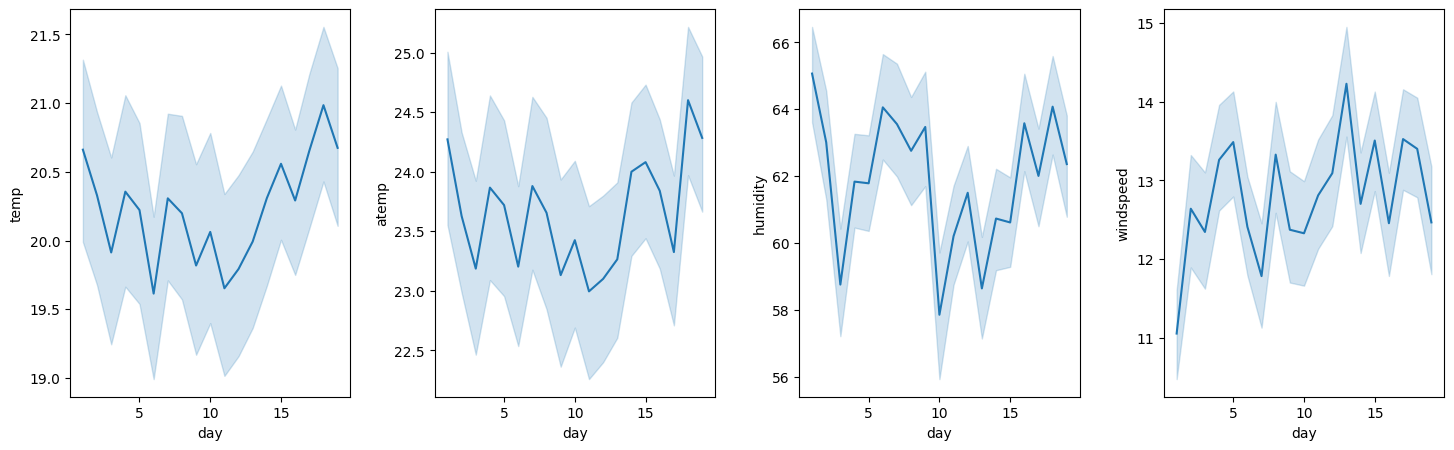

In [ ]:
#A line plot to represent change in temperature, feeling temperature, humidity and windspeed on day-to-day basis.
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
sns.lineplot(x='day', y='temp', data=df, ax=axis[0])
sns.lineplot(x='day', y='atemp', data=df, ax=axis[1])
sns.lineplot(x='day', y='humidity', data=df, ax=axis[2])
sns.lineplot(x='day', y='windspeed', data=df, ax=axis[3])
plt.show()

<B>day-to-day tempeature change</B> -> The day-to-day temperature change is actually fluctuating.

<B>day-to-day feeling tempeature change</B> -> The day-to-day feeling temperature change is also observed to be fluctuating.

<B>day-to-day humidity change</B> -> The day-to-day humidity change is fluctuating in nature.

<B>day-to-day windspeed change</B> -> The day-to-day windspeed change is also fluctuating in nature.

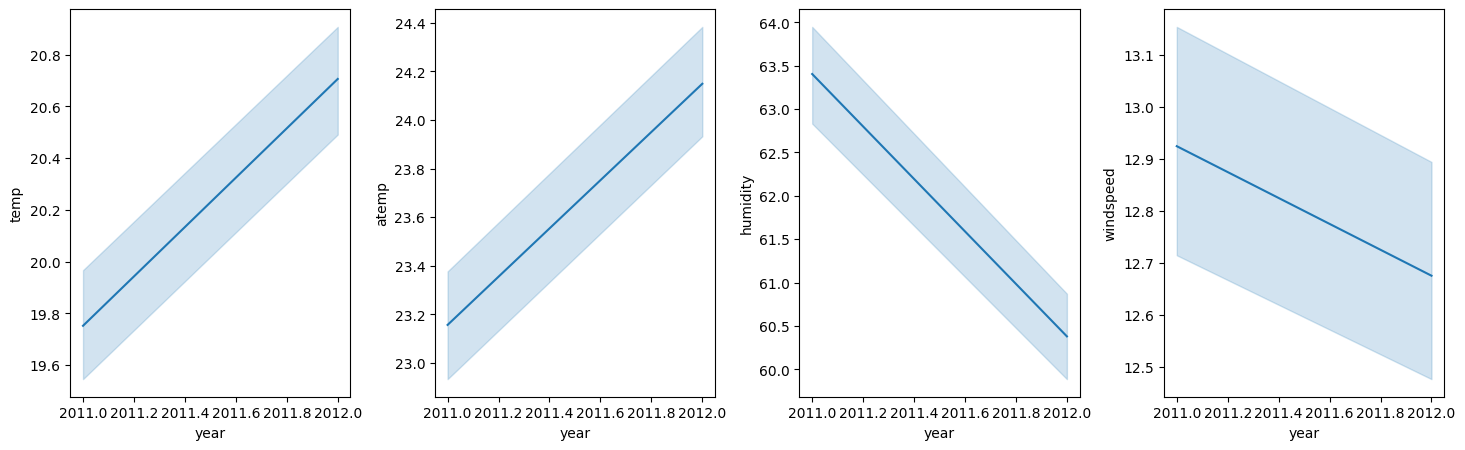

In [ ]:
#A line plot to represent change in temperature, feeling temperature, humidity and windspeed on yearly basis.
fig, axis = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
sns.lineplot(x='year', y='temp', data=df, ax=axis[0])
sns.lineplot(x='year', y='atemp', data=df, ax=axis[1])
sns.lineplot(x='year', y='humidity', data=df, ax=axis[2])
sns.lineplot(x='year', y='windspeed', data=df, ax=axis[3])
plt.show()

<B>yearly tempeature change</B> -> The temperature increases from 2011 to 2012.

<B>yearly feeling tempeature change</B> -> The feeling temperature increases from 2011 to 2012.

<B>yearly humidity change</B> -> The humidity decreases from 2011 to 2012.

<B>yearly windspeed change</B> -> The windspeed also decreases from 2011 to 2012.

<H1><font color='skyblue'>Hypothesis Testing</font></H1>

<H3><font color='skyblue'>Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?</font></H3>

<B>Hypothesis Statement</B>

H0 : There  is no significant difference between the no. of bike rides on Weekdays and Weekends.

Ha : There is a significant difference between the no. of bike rides on Weekdays and Weekends.


In [ ]:
#Partitioning the number of riders on weekdays and weekends.
Week_Day = df[df['workingday'] == 0]['count']
Week_End = df[df['workingday'] == 1]['count']

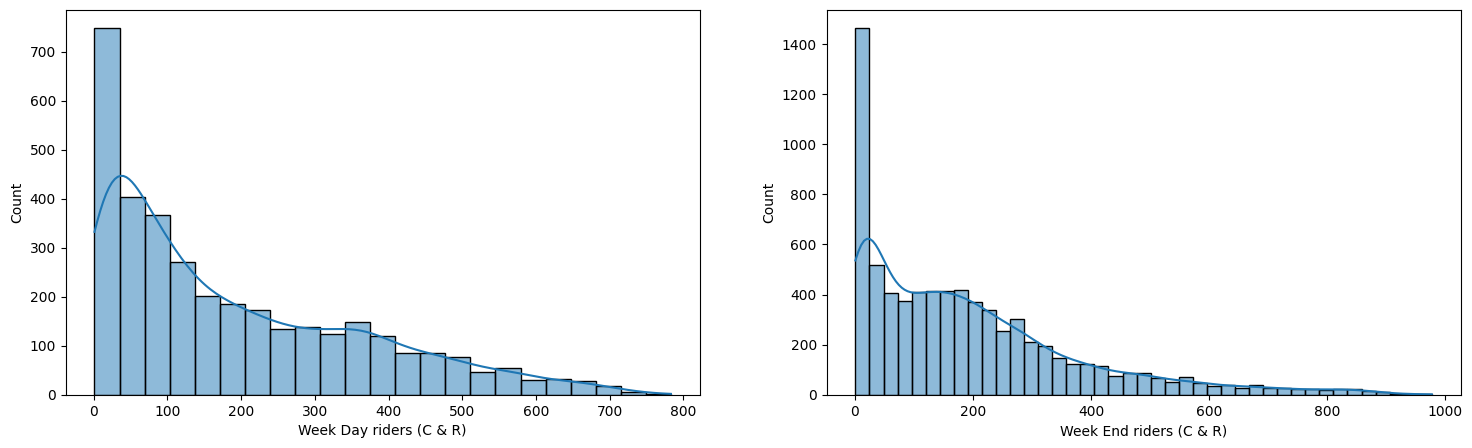

In [ ]:
#Plotting a histogram for weekend riders and weekday riders
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.histplot(Week_Day, kde=True, ax=ax[0])
ax[0].set_xlabel('Week Day riders (C & R)')
sns.histplot(Week_End, kde=True, ax=ax[1])
ax[1].set_xlabel('Week End riders (C & R)')
plt.show()

It seems like both graphs are right skewed.

In [ ]:
#Calculation of t-statistic and p_value
tstat, p_value = ttest_ind(Week_Day, Week_End)

In [ ]:
#Condition to accept or reject null hypothesis
if p_value < 0.05:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Reject H0, There is a significant difference between the no. of bike rides on Weekdays and Weekends.")
else:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Failed to reject H0, There is no significant difference between the no. of bike rides on Weekdays and Weekends.")

t-statistic :  -1.2096277376026694
p-value     :  0.22644804226361348
Failed to reject H0, There is no significant difference between the no. of bike rides on Weekdays and Weekends.


In [ ]:
#Cross-verifying if there's any significant difference between the no. of bike rides on weekdays and weekends.
print("Mean rides of the week days",Week_Day.mean())
print("Mean rides of the week ends",Week_End.mean())

Mean rides of the week days 188.50662061024755
Mean rides of the week ends 193.01187263896384


<B>From the P-value and cross-verification we can say that we failed to reject H0, There is no significant difference between the no. of bike rides on Weekdays and Weekends.</B>

<H3><font color = 'skyblue'>Check if the demand of bicycles on rent is the same for different Weather conditions?</font></H3>

<B>Hypothesis Statement</B>

H0 : The demand of bicycles on rent is same for different weather conditions.

Ha : The demand of bicycles on rent is different for atleast 1 weather conditions.

In [ ]:
#Partitioning the number of riders under each weather conditions.
weather_1 = df[df['weather'] == 1]['count']
weather_2 = df[df['weather'] == 2]['count']
weather_3 = df[df['weather'] == 3]['count']
weather_4 = df[df['weather'] == 4]['count']

<H3>ANOVA Assumption 1 : The data should follow a gaussian distribution</H3>

<B> Plot - 1 : Histogram </B>


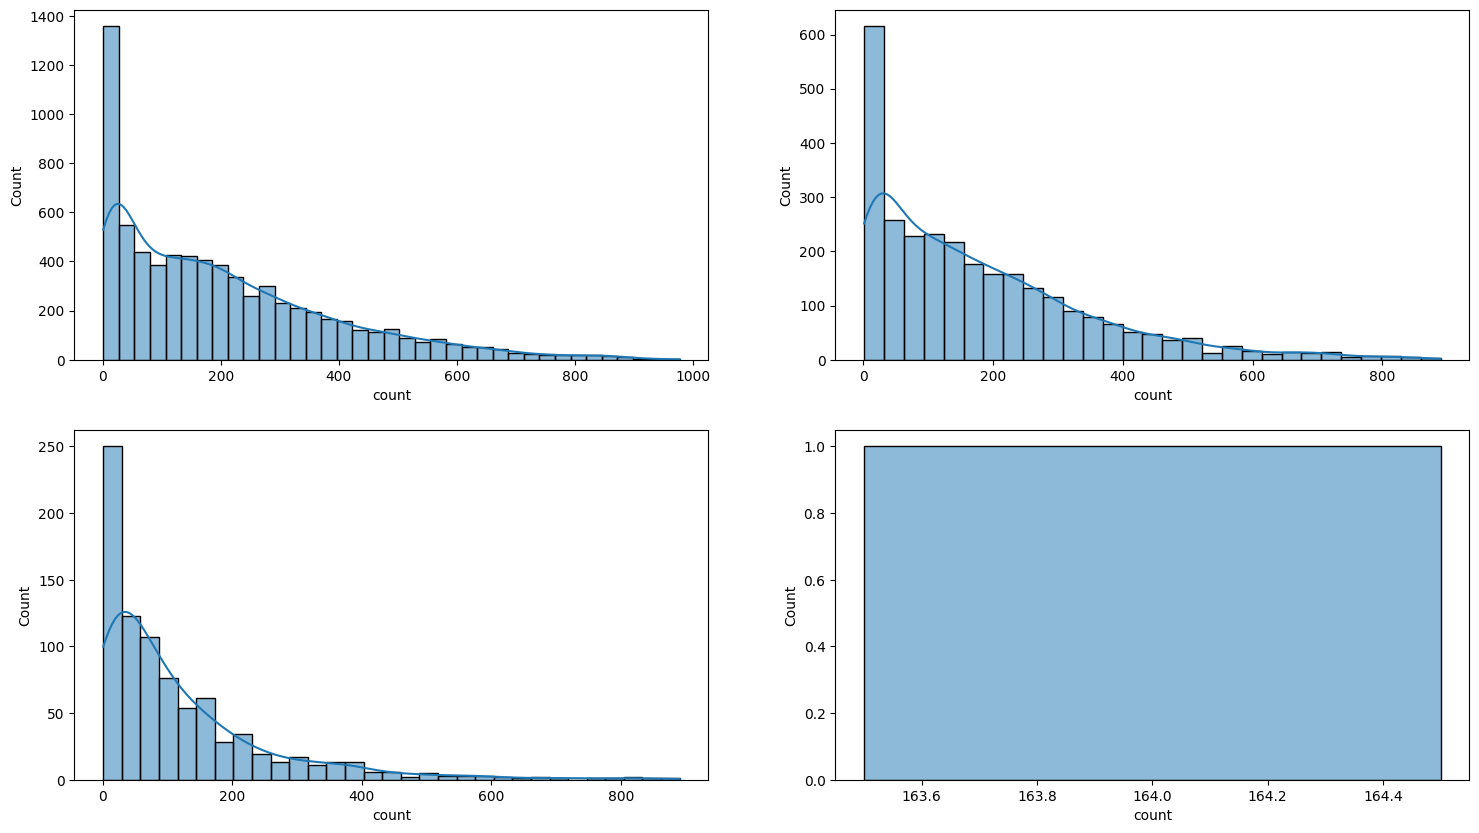

In [ ]:
#Histogram to show the distribution of the all 4 groups
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(weather_1, kde=True, ax=ax[0, 0])
sns.histplot(weather_2, kde=True, ax=ax[0, 1])
sns.histplot(weather_3, kde=True, ax=ax[1, 0])
sns.histplot(weather_4, kde=True, ax=ax[1, 1])
plt.show()

All 3 groups shows that the samples follow a right skew pattern. However, the right bottom one has only one value in it.

<B> Plot 2 : QQ-plot</B>

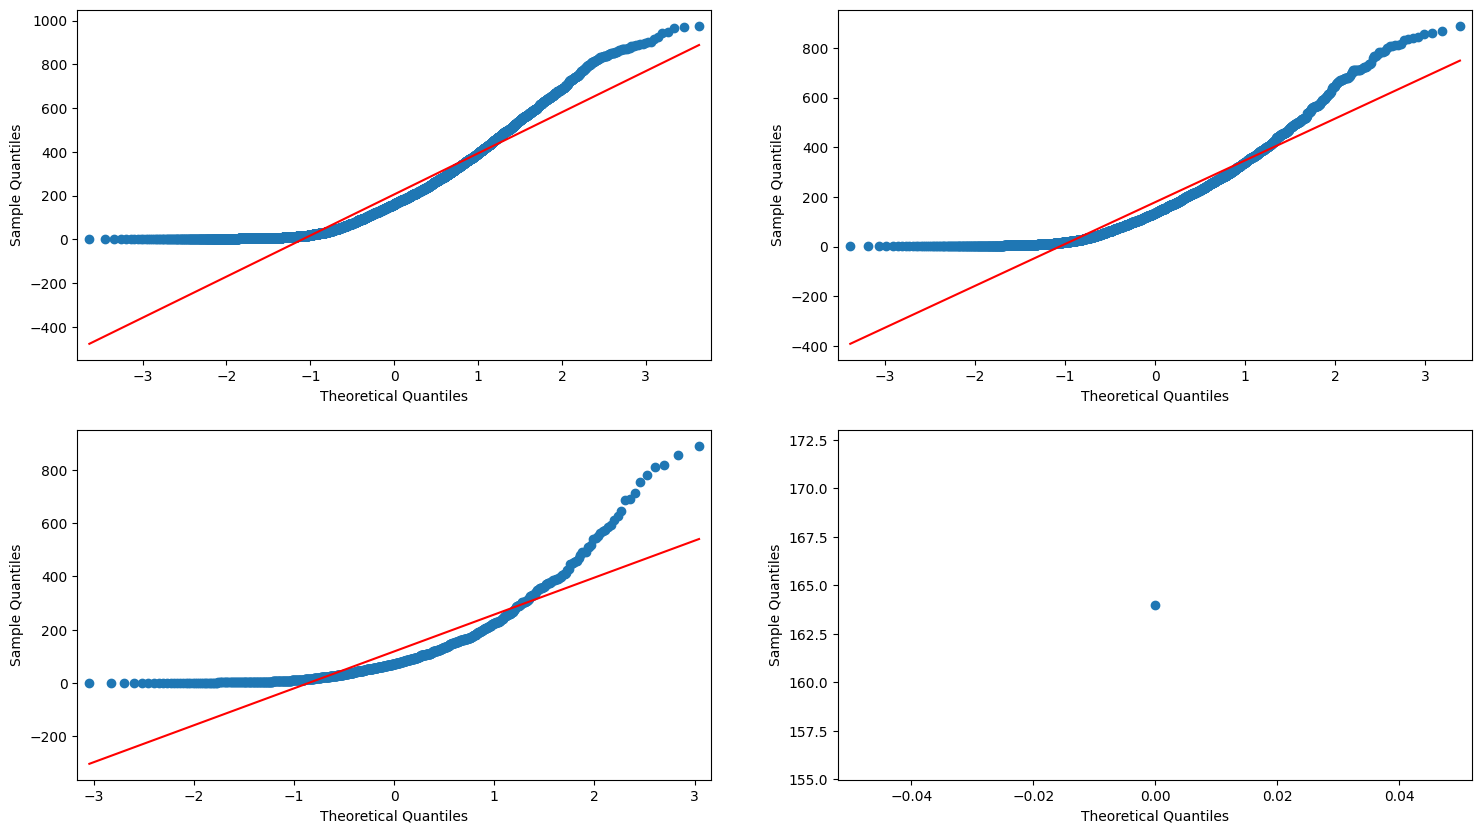

In [ ]:
#QQ-plot to show the distribution of the all 4 groups
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
qqplot(weather_1, line='s', ax=ax[0, 0])
qqplot(weather_2, line='s', ax=ax[0, 1])
qqplot(weather_3, line='s', ax=ax[1, 0])
qqplot(weather_4, line='s', ax=ax[1, 1])
plt.show()

From the above figures we can conclude that the data does not follow a gaussian distribution. The right bottom one has only one value in it

<B>Skewness of the data</B>

In [ ]:
#To check the skewness of the 4 groups
print("weather 1 :",skew(weather_1))
print("weather 2 :",skew(weather_2))
print("weather 3 :",skew(weather_3))
print("weather 4 :",skew(weather_4))

weather 1 : 1.1396195185041555
weather 2 : 1.293759189703101
weather 3 : 2.1833160390123187
weather 4 : nan


All 3 groups have positive values indicating they have a positive skewness, or right skewed. However, the last one shows a nan value.

<B>Distribution of the data</B>

In [ ]:
#To check the distribution of the 4 groups
print("weather 1 :",kurtosis(weather_1))
print("weather 2 :",kurtosis(weather_2))
print("weather 3 :",kurtosis(weather_3))
print("weather 4 :",kurtosis(weather_4))

weather 1 : 0.9632151489948488
weather 2 : 1.5835130178554868
weather 3 : 5.961191782478394
weather 4 : nan


All 3 groups have positive valiues indicating they have a thin distribution. However, the last one shows a nan value.

<H3><B>Since there's only one value in weather_4, we can drop this value.</B></H3>

<H3>Shapiro test to confirm that the data is normal or not</H3>

<B>Hypothesis Statement</B>

H0 : Data is a normal distribution.

Ha : Data is not a normal distribution.

In [ ]:
#Shapiro test for confirming the data is normal or not
weather_1_samp = weather_1.sample(100)
weather_2_samp = weather_2.sample(100)
weather_3_samp = weather_3.sample(100)
sstat_1, p_value_1 = shapiro(weather_1_samp)
sstat_2, p_value_2 = shapiro(weather_2_samp)
sstat_3, p_value_3 = shapiro(weather_3_samp)
print('s-statistic : ', sstat_1, sstat_2, sstat_3)
print('p-value     : ', p_value_1, p_value_2, p_value_3)

s-statistic :  0.9244401454925537 0.8568418025970459 0.8023078441619873
p-value     :  2.4403118004556745e-05 2.1402717820251382e-08 2.9166224990717637e-10


In [ ]:
#Condition to accept or reject null hypothesis
if p_value_1 < 0.05:
  print(p_value_1,"<",0.05,"Reject H0, Data is not a normal distribution.")
else:
  print("Failed to reject H0, Data is a normal distribution.")
if p_value_2 < 0.05:
  print(p_value_2,"<",0.05,"Reject H0, Data is not a normal distribution.")
else:
  print("Failed to reject H0, Data is a normal distribution.")
if p_value_3 < 0.05:
  print(p_value_3,"<",0.05,"Reject H0, Data is not a normal distribution.")
else:
  print("Failed to reject H0, Data is a normal distribution.")

2.4403118004556745e-05 < 0.05 Reject H0, Data is not a normal distribution.
2.1402717820251382e-08 < 0.05 Reject H0, Data is not a normal distribution.
2.9166224990717637e-10 < 0.05 Reject H0, Data is not a normal distribution.


<B>ANOVA Assumption 1 failed, Data is not a normal distribution.</B>

<H3>ANOVA Assumption 2 : To test the variance of different groups are same</H3>
<B>Hypothesis Statement</B>

H0 : Variance across the different groups are same.

Ha : Variance across the different groups are not same (different).


In [ ]:
#Checking the assumption of ANOVA is true or Not : variance of all the groups are same or not
lstat, p_value = levene(weather_1, weather_2, weather_3)

In [ ]:
#Condition to accept or reject null hypothesis
if p_value < 0.05:
  print('l-statistic : ', lstat)
  print('p-value     : ', p_value)
  print("Reject H0, Variance across the different groups are not same (different).")
else:
  print('l-statistic : ', lstat)
  print('p-value     : ', p_value)
  print("Failed to reject H0, Variance across the different groups are same.")

l-statistic :  81.67574924435011
p-value     :  6.198278710731511e-36
Reject H0, Variance across the different groups are not same (different).


<B>ANOVA Assumption 2 failed, Variance across the different groups are not same (different).</B>

In [ ]:
#Performing one-way ANOVA
fstat, p_value = f_oneway(weather_1, weather_2, weather_3)
print('f-statistic: ', fstat)
print('p-value: ', p_value)

f-statistic:  98.28356881946706
p-value:  4.976448509904196e-43


In [ ]:
#conditions to accept or reject null hypothesis
if p_value < 0.05:
  print("Reject H0 : The demand of bicycles on rent is different for atleast 1 weather conditions.")
else:
  print("Failed to reject H0 : The demand of bicycles on rent is same for different weather conditions.")

Reject H0 : The demand of bicycles on rent is different for atleast 1 weather conditions.


<H3>Kruskal-Wallis test</H3>


In [ ]:
#Kruskal wallis test
kstat, p_value = kruskal(weather_1, weather_2, weather_3)
print('k-statistic : ', kstat)
print('p-value     : ', p_value)

k-statistic :  204.95566833068537
p-value     :  3.122066178659941e-45


In [ ]:
#conditions to accept or reject null hypothesis
if p_value < 0.05:
  print("Reject H0 : The demand of bicycles on rent is different for atleast 1 weather conditions.")
else:
  print("Failed to reject H0 : The demand of bicycles on rent is same for different weather conditions.")

Reject H0 : The demand of bicycles on rent is different for atleast 1 weather conditions.


<B>Since our ANOVA test cannot be trusted because the assumptions of ANOVA has failed. However, the ANOVA results in the conclusion that the demand of bicycles on rent is different for atleast 1 weather conditions. This is then cross-verified with the kruskal - wallis test as it revolves around the assumption of considering the medians and the data need not be normally distributed</B>

<H3><font color = "skyblue">Check if the demand of bicycles on rent is the same for different Seasons?</font></H3>

<B>Hypothesis Statement</B>

H0 : The demand of bicycles on rent is same for different seasons.

Ha : The demand of bicycles on rent is different for atleast 1 season.

In [ ]:
#Partitioning the number of riders under each seasons.
season_1 = df[df['season'] == 1]['count']
season_2 = df[df['season'] == 2]['count']
season_3 = df[df['season'] == 3]['count']
season_4 = df[df['season'] == 4]['count']

<H3>ANOVA Assumption 1 : The data should follow a gaussian/ normal distribution</H3>

<B> Plot - 1 : Histogram </B>


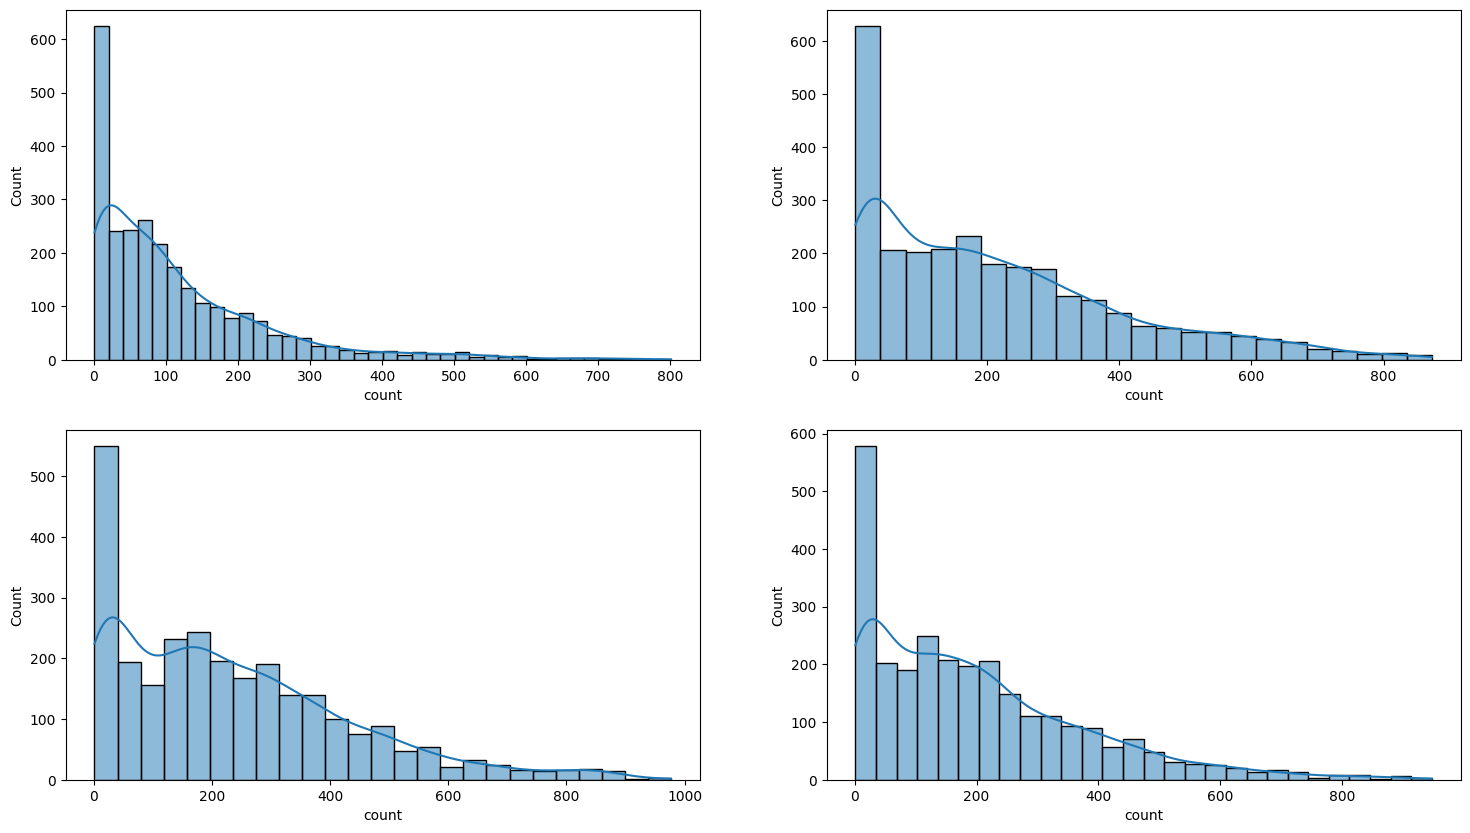

In [ ]:
#Histogram to show the distribution of the all 4 season groups
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(season_1, kde=True, ax=ax[0, 0])
sns.histplot(season_2, kde=True, ax=ax[0, 1])
sns.histplot(season_3, kde=True, ax=ax[1, 0])
sns.histplot(season_4, kde=True, ax=ax[1, 1])
plt.show()

All 4 groups shows that the samples follow a right skew pattern.

<B> Plot 2 : QQ-plot</B>

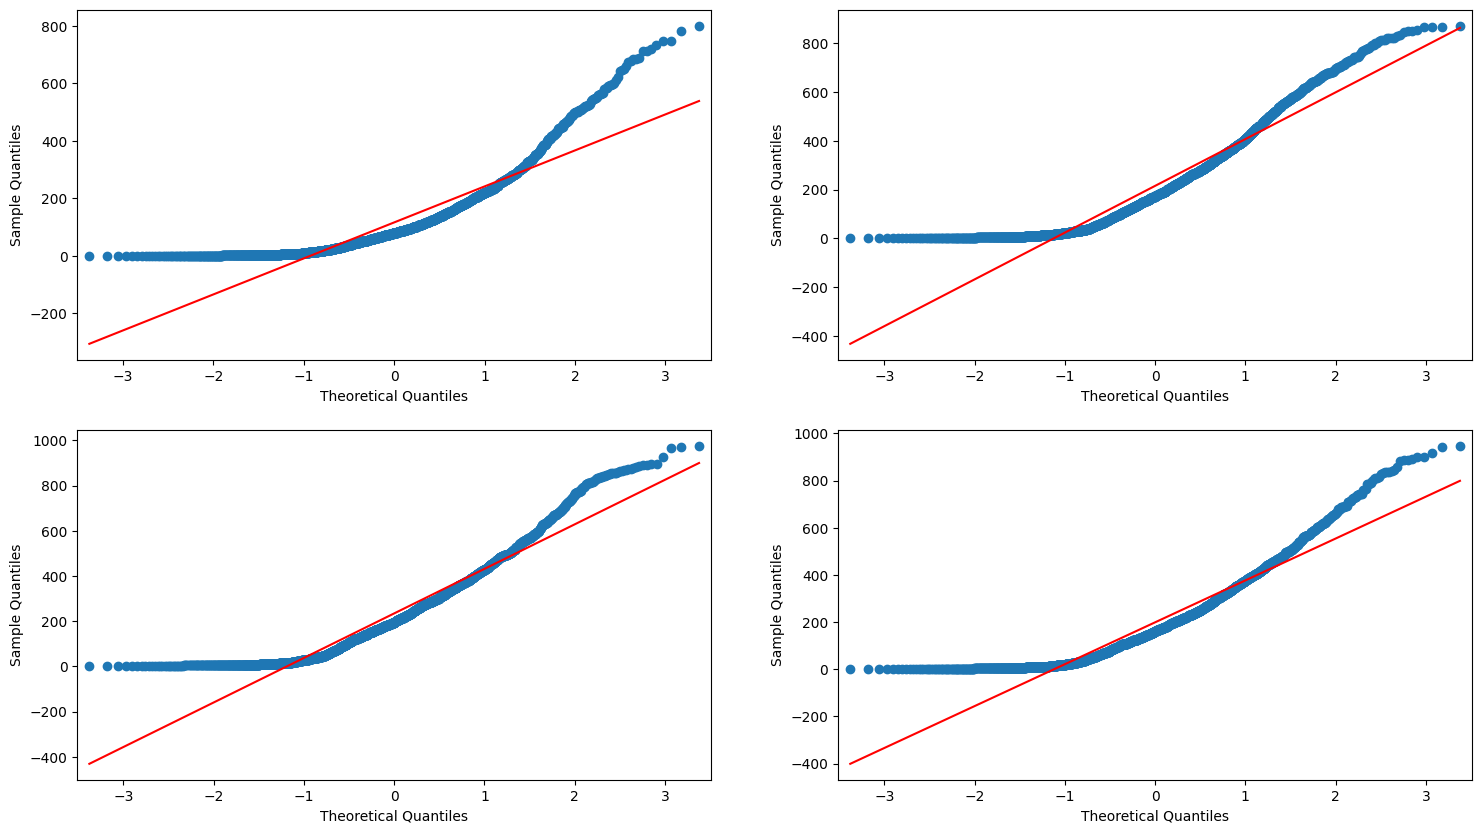

In [ ]:
#QQ-plot to show the distribution of the all 4 groups
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
qqplot(season_1, line='s', ax=ax[0, 0])
qqplot(season_2, line='s', ax=ax[0, 1])
qqplot(season_3, line='s', ax=ax[1, 0])
qqplot(season_4, line='s', ax=ax[1, 1])
plt.show()

From the above figures we can conclude that the data does not follow a gaussian distribution.

<B>Skewness of the data</B>

In [ ]:
#To check the skewness of the 4 groups
print("season 1 :",skew(season_1))
print("season 2 :",skew(season_2))
print("season 3 :",skew(season_3))
print("season 4 :",skew(season_4))

season 1 : 1.8870013494363214
season 2 : 1.0027135037743604
season 3 : 0.9909503852121176
season 4 : 1.1714741534595685


All 4 groups have positive values indicating they have a positive skewness, or right skewed.

<B>Distribution of the data</B>

In [ ]:
#To chck the distribution of the data
print("season 1 :",kurtosis(season_1))
print("season 2 :",kurtosis(season_2))
print("season 3 :",kurtosis(season_3))
print("season 4 :",kurtosis(season_4))

season 1 : 4.30449666648592
season 2 : 0.4222412657621657
season 3 : 0.6959091337333851
season 4 : 1.2689637849725477


All 4 groups have positive valiues indicating they have a thin distribution.

<H3>Shapiro test to confirm that the data is normal or not</H3>

<B>Hypothesis Statement</B>

H0 : Data is a normal distribution.

Ha : Data is not a normal distribution.

In [ ]:
#Shapiro test for confirming the data is normal or not
sstat_1, p_value_1 = shapiro(season_1)
sstat_2, p_value_2 = shapiro(season_2)
sstat_3, p_value_3 = shapiro(season_3)
sstat_4, p_value_4 = shapiro(season_4)
print('s-statistic : ', sstat_1, sstat_2, sstat_3, sstat_4)
print('p-value     : ', p_value_1, p_value_2, p_value_3, p_value_4)

s-statistic :  0.8087388873100281 0.900481641292572 0.9148160815238953 0.8954644799232483
p-value     :  0.0 6.039093315091269e-39 1.043458045587339e-36 1.1301682309549298e-39


In [ ]:
#Condition to accept or reject null hypothesis
if p_value_1 < 0.05:
  print(p_value_1,"<",0.05,"Reject H0, Data is not a normal distribution.")
else:
  print("Failed to reject H0, Data is a normal distribution.")
if p_value_2 < 0.05:
  print(p_value_2,"<",0.05,"Reject H0, Data is not a normal distribution.")
else:
  print("Failed to reject H0, Data is a normal distribution.")
if p_value_3 < 0.05:
  print(p_value_3,"<",0.05,"Reject H0, Data is not a normal distribution.")
else:
  print("Failed to reject H0, Data is a normal distribution.")
if p_value_4 < 0.05:
  print(p_value_4,"<",0.05,"Reject H0, Data is not a normal distribution.")
else:
  print("Failed to reject H0, Data is a normal distribution.")

0.0 < 0.05 Reject H0, Data is not a normal distribution.
6.039093315091269e-39 < 0.05 Reject H0, Data is not a normal distribution.
1.043458045587339e-36 < 0.05 Reject H0, Data is not a normal distribution.
1.1301682309549298e-39 < 0.05 Reject H0, Data is not a normal distribution.


<B>ANOVA Assumption 1 failed, Data is not a normal distribution.</B>

<H3>ANOVA Assumption 2 : To test the variance of different groups are same</H3>
<B>Hypothesis Statement</B>

H0 : Variance across the different groups are same.

Ha : Variance across the different groups are not same (different).

In [ ]:
#Checking the assumption of ANOVA is true or Not : variance of all the groups are same or not
lstat, p_value = levene(season_1, season_2, season_3, season_4)

In [ ]:
#Condition to accept or reject null hypothesis
if p_value < 0.05:
  print('l-statistic : ', lstat)
  print('p-value     : ', p_value)
  print("Reject H0, Variance across the different groups are not same (different).")
else:
  print('l-statistic : ', lstat)
  print('p-value     : ', p_value)
  print("Failed to reject H0, Variance across the different groups are same.")

l-statistic :  187.7706624026276
p-value     :  1.0147116860043298e-118
Reject H0, Variance across the different groups are not same (different).


<B>ANOVA Assumption 2 failed, Variance across the different groups are not same (different).</B>

In [ ]:
#Performing one-way ANOVA
fstat, p_value = f_oneway(season_1, season_2, season_3, season_4)
print('f-statistic: ', fstat)
print('p-value: ', p_value)

f-statistic:  236.94671081032106
p-value:  6.164843386499654e-149


In [ ]:
#conditions to accept or reject null hypothesis
if p_value < 0.05:
  print("Reject H0 : The demand of bicycles on rent is different for atleast 1 season")
else:
  print("Failed to reject H0 : The demand of bicycles on rent is same for different season.")

Reject H0 : The demand of bicycles on rent is different for atleast 1 season


<H3>Kruskal-wallis Test</H3>

<B>Hypothesis Statement</B>

H0 : The demand of bicycles on rent is same for different seasons

Ha : The demand of bicycles on rent is different for atleast 1 seasons.

In [ ]:
#Kruskal wallis test
kstat, p_value = kruskal(season_1, season_2, season_3, season_4)
print('k-statistic : ', kstat)
print('p-value     : ', p_value)

k-statistic :  699.6668548181988
p-value     :  2.479008372608633e-151


In [ ]:
#conditions to accept or reject null hypothesis
if p_value < 0.05:
  print("Reject H0 : The demand of bicycles on rent is different for atleast 1 season")
else:
  print("Failed to reject H0 : The demand of bicycles on rent is same for different season")

Reject H0 : The demand of bicycles on rent is different for atleast 1 season


<B>Since our ANOVA test cannot be trusted because the assumptions of ANOVA has failed. However, the ANOVA results in the conclusion that the demand of bicycles on rent is different for atleast 1 season. This is then cross-verified with the kruskal - wallis test as it revolves around the assumption of considering the medians and the data need not be normally distributed</B>

<H3><font color = 'skyblue'>Check if the Weather conditions are significantly different during different Seasons?</font></H3>

<H3>Chi-Square test for independence</H3>
<B>Hypothesis Statement</B>

H0 : Weather and season are independent, weather conditions are significantly different during different seasons.

Ha : Weather and season are not independent, weather conditions are not significantly different during different seasons..

In [ ]:
#segregation of count based on season and weather using cross-tab
df_new['season'] = df_new['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_new['weather'] = df_new['weather'].map({1:'clear', 2:'mist', 3:'light rain', 4:'heavy rain'})
Weather_Season = pd.crosstab(df_new['weather'], df_new['season'])
Weather_Season

season,fall,spring,summer,winter
weather,,,,
clear,1930,1759,1801,1702
heavy rain,0,1,0,0
light rain,199,211,224,225
mist,604,715,708,807


In [ ]:
#Performing a chi-square test for independence
chistat, p_value, dof, f_exp = chi2_contingency(Weather_Season)
print('chi-square: ', chistat)
print('p-value: ', p_value)

chi-square:  49.15865559689363
p-value:  1.5499250736864862e-07


In [ ]:
#conditions to accept or reject null hypothesis
if p_value < 0.05:
  print("Reject H0 : Weather and season are not independent, weather conditions are not significantly different (or has impact) during different seasons.")
else:
  print("Failed to reject H0 : Weather and season are independent, weather conditions are significantly different (or has no impact) during different seasons.")

Reject H0 : Weather and season are not independent, weather conditions are not significantly different (or has impact) during different seasons.


<B>Thus we can conclude that weather conditions have some impact on different seasons.</B>

<H1>Recommendations</H1>

> Most of the riders uses the bike on workingdays for easy commute and so if possible try to provide discounts for students and working professionals.

> Most of the riders uses the bike on clear sky weather conditions. As an advice if we can increase the number of bike it may result in profit rise during clear sky weather conditions.

> Most of the riders uses the bike on fall. As an advice if we can increase the number of bike it may result in profit rise during fall season.